<a href="https://colab.research.google.com/github/wbandabarragan/computational-physics-1/blob/main/unit-1/107-Python-Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reviews of Python Functions

## 1. Built-in Functions:

In [1]:
print(type(len))
print(type(abs))

<class 'builtin_function_or_method'>
<class 'builtin_function_or_method'>


## 2. Third-party function:

In [2]:
import numpy as np

In [3]:
print(type(np.sin))

<class 'numpy.ufunc'>


## 3. Our own functions:

Customised functions have:

1. Header: def ___(arg):

2. Body: Needs to be indented, statements, finishes with return ___

### Example on thermodynamics:

$$pV=NRT$$

$$p = n k_B T$$, where $n = \frac{\rho}{\mu m}$



In [4]:
# Example:

# Boltzmann constant k_B:
k_B = 1.380649e-23 #m2 kg s-2 K-1

# Header
def pressure(n, T):
  # Body
  """
  Function used to compute the thermal pressure of ideal gases
  Inputs: n (number density), T (temperature)
  Output: prs (pressure)
  Author: W.E.B.B.
  Date created: 28/04/23
  Date modified: 02/05/2023
  """

  # What you compute
  prs = n*k_B*T

  # What you return
  return prs


In [5]:
# Get help on how to use the function

help(pressure)

Help on function pressure in module __main__:

pressure(n, T)
    Function used to compute the thermal pressure of ideal gases
    Inputs: n (number density), T (temperature)
    Output: prs (pressure)
    Author: W.E.B.B.
    Date created: 28/04/23
    Date modified: 02/05/2023



In [6]:
# Call the function
n = 0.1 #m^{-3}
T = 290 #K

pres = pressure(n, T)

print("The pressure in N/m^2 is:", pres)

The pressure in N/m^2 is: 4.0038821000000004e-22


In [7]:
# Evaluate function using vectors
n_vector = np.arange(-3., 5., 0.1) # in log10 scale
T_vector = np.arange(1., 9., 0.1) # in log10 scale 

# Create a 2D grid
n_2D, T_2D = np.meshgrid(n_vector, T_vector)

print(n_vector.shape)
print(T_vector.shape)
print(n_2D.shape, T_2D.shape)

(80,)
(80,)
(80, 80) (80, 80)


In [8]:
# Call the function:

pres_2D = pressure(10**n_2D, 10**T_2D) # This is to fee the function with linear quantities

print(pres_2D.shape)

(80, 80)


In [9]:
import matplotlib.pyplot as plt

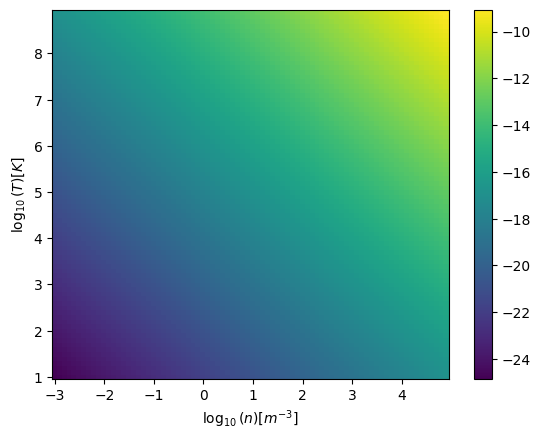

In [10]:
# Ready to plot the solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.pcolor(n_2D, T_2D, np.log10(pres_2D))

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$\log_{10}(n) [m^{-3}]$")
plt.ylabel(r"$\log_{10}(T) [K]$")

plt.show()

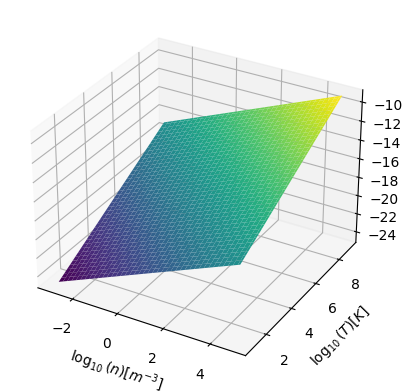

In [11]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n_2D, T_2D, np.log10(pres_2D), cmap = 'viridis')

ax.set_xlabel(r"$\log_{10}(n) [m^{-3}]$")
ax.set_ylabel(r"$\log_{10}(T) [K]$")

plt.show()

### Example on thermodynamics: Multiple returned objects

Remember: 

$\rho= \mu\,m\,n$

where: $\mu$ is related to teh comopsition of the gas, $m\equiv$ 1 atomic mass unit. 



In [12]:
# Let's use Scipy (Scientific Python Library)

import scipy.constants as cte

In [13]:
# Define 1 amu
m = cte.atomic_mass
#print(m)

# Define Boltzmann constant
k_B = cte.k
#print(k_B)

# Fix mu for ionised gas
mu_i = 0.6 

# New function
def thermal_gas(n, T):
  # Body
  """
  Function used to compute the thermal pressure and density of ideal gases
  Inputs: n (number density), T (temperature)
  Outputs: prs (pressure), den (density)  
  Author: W.E.B.B.
  Date created: 28/04/23
  Date modified: 02/05/2023
  """

  # What we compute the thermal pressure
  prs = n*k_B*T

  # And now we return the mass density
  den = mu_i*m*n

  # What you return
  return prs, den


In [14]:
help(thermal_gas)

Help on function thermal_gas in module __main__:

thermal_gas(n, T)
    Function used to compute the thermal pressure and density of ideal gases
    Inputs: n (number density), T (temperature)
    Outputs: prs (pressure), den (density)  
    Author: W.E.B.B.
    Date created: 28/04/23
    Date modified: 02/05/2023



In [15]:
# Call the new function:

pres_2D, dens_2D = thermal_gas(10**n_2D, 10**T_2D) # This is to fee the function with linear quantities

print(pres_2D.shape, dens_2D.shape)

(80, 80) (80, 80)


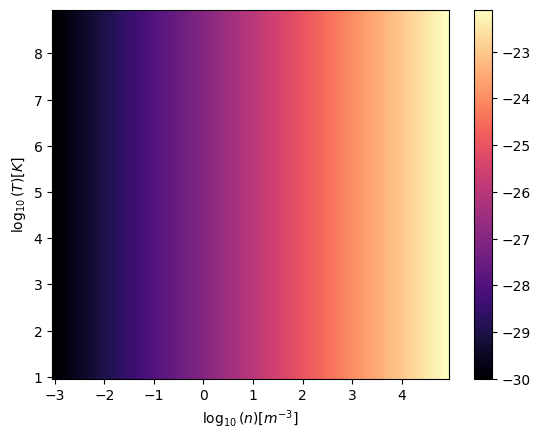

In [16]:
# Ready to plot the density solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.pcolor(n_2D, T_2D, np.log10(dens_2D), cmap = "magma")

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$\log_{10}(n) [m^{-3}]$")
plt.ylabel(r"$\log_{10}(T) [K]$")

plt.show()

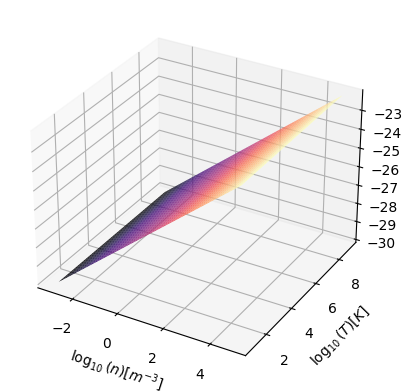

In [17]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n_2D, T_2D, np.log10(dens_2D), cmap = 'magma')

ax.set_xlabel(r"$\log_{10}(n) [m^{-3}]$")
ax.set_ylabel(r"$\log_{10}(T) [K]$")

plt.show()

## 4. Lambda Functions:

These are used to quickly define and use functions.

lambda arguments: expression

In [18]:
# We want to calculate the cube of a vector/array

def cube_function(x):
  """
  A function to cube a number/vector/array
  """
  cube_x = x**3

  return cube_x


In [19]:
# Call the funtion
x_1D = np.arange(0., 10., 1.)
y_1D = cube_function(x_1D)

print(x_1D)
print(y_1D)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[  0.   1.   8.  27.  64. 125. 216. 343. 512. 729.]


In [20]:
# Instead we can use a lambda function
z_1D = lambda x: x**3

print(z_1D(x_1D))

[  0.   1.   8.  27.  64. 125. 216. 343. 512. 729.]


### Example: Lambda functions for surfaces

$z = f(x,y) = \sin(x) + \cos(y)$

In [21]:
# Instead we can use a lambda function
# Create 1D vectors
x = np.arange(-2*np.pi, +2*np.pi, 0.01)
y = np.arange(-2*np.pi, +2*np.pi, 0.01)

# Create 2D arrays for the grid
x_2D, y_2D = np.meshgrid(x, y)

# Define a surface with a lambda function
z_2D = lambda x, y: np.sin(x) + np.cos(y) 

# Checking stuff
print(z_2D(x_2D, y_2D).shape)

(1257, 1257)


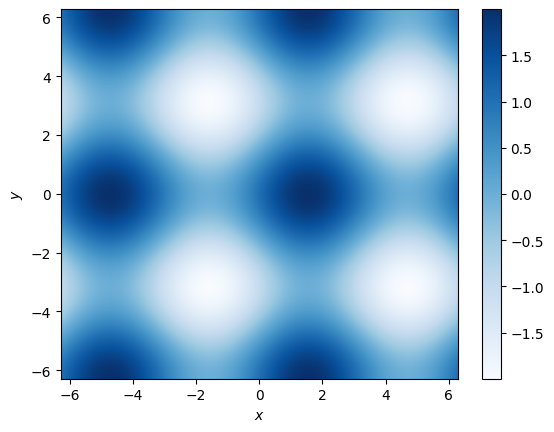

In [22]:
# Ready to plot the density solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.pcolor(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Blues")

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

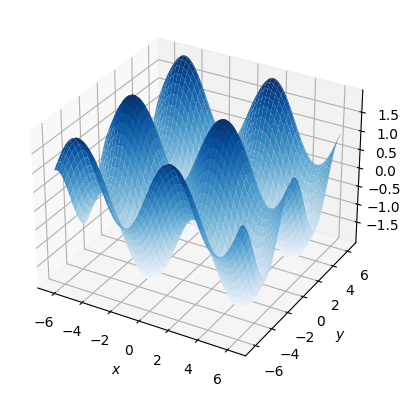

In [28]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Blues")

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

plt.show()

## 5. Nested functions:

A function inside a function.

Normally, when we want to simply the code, it is worth calling a function from within another function.


### Example:

Compute distances between three particles in 3D using a metric:

$d_{12} =\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 + (z_2-z_1)^2  }$

In [23]:
# Let's hard code this function

def distance_3d(p1, p2, p3):
  """
  This is to calculate distances between 3 particles in 3D
  Inputs: p1, p2, p3 are 3D coordinates of each particle
  Outputs: d_12, d_13, d_23 are distances between teh particles
  """

  d_12 = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)
  d_13 = np.sqrt((p1[0] - p3[0])**2 + (p1[1] - p3[1])**2 + (p1[2] - p3[2])**2)
  d_23 = np.sqrt((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2 + (p3[2] - p2[2])**2)

  return d_12, d_13, d_23


In [24]:
# Call the function:
# Define 3D coordinates of th particles

part_1 = (0., 0., 0.)
part_2 = (1., 1., 1.)
part_3 = (3., -3., 3.)

# Unpack outputs
dist_12, dist_13, dist_23 = distance_3d(part_1, part_2, part_3)

print(dist_12, dist_13, dist_23)

1.7320508075688772 5.196152422706632 4.898979485566356


In [25]:
# 2nd method
# Let's use nested functions

# Parent function / Main function
def metric_3d(p1, p2, p3):
  """
  This is to calculate distances between 3 particles in 3D
  Inputs: p1, p2, p3 are 3D coordinates of each particle
  Outputs: d_12, d_13, d_23 are distances between teh particles
  """

  # Nested function / Child function
  def metric(o1, o2):
    """
    This is to compute the distance between two of the particles.
    Inputs: o1 - object1, o2 - object2
    Outputs: distance between objects 1 and 2
    """
    met = np.sqrt((o1[0] - o2[0])**2 + (o1[1] - o2[1])**2 + (o1[2] - o2[2])**2)

    return met

  d_12 = metric(p1, p2)
  d_13 = metric(p1, p3)
  d_23 = metric(p2, p3)

  return d_12, d_13, d_23

In [26]:
# Unpack outputs
met_12, met_13, met_23 = metric_3d(part_1, part_2, part_3)

print(met_12, met_13, met_23)

1.7320508075688772 5.196152422706632 4.898979485566356


## 6. Recursive function:

This is a nested function, where we call the main function again.

### Example:

$f(n)=n!$

If $n=1$, $f(n=1)=1$

If $n$ takes any other value, $n\,f(n-1)$

In [29]:
# Example

def factorial(n):
  """
  Calculate and return the factorial of n, which is a positive integer
  """

  if n == 1:
    # First case
    f_1 = 1
    return f_1
  else:
    # Other cases, we do a recursive call
    f_2 = n*factorial(n-1)
    return f_2
  

In [32]:
# Call the function
n_1 = 4
y_1 = factorial(n_1)
print(y_1)

n_2 = 7
y_2 = factorial(n_2)
print(y_2)

24
5040


In [33]:
7*6*5*4*3*2*1

5040

## 7. Functions can also be arguments of other functions

In [35]:
# Pass a native python function (abs) to a python object/variable (obj)
obj = abs

print(type(obj))
print(obj(-5.))

<class 'builtin_function_or_method'>
5.0


In [39]:
# Another example

print(obj(np.array([-1.,2.,-10.])))

[ 1.  2. 10.]


In [40]:
# Example: not recommeded

obj = max

print(obj(np.array([-1.,2.,-10.])))


2.0


In [42]:
#%whos

In [43]:
# Example:

def my_function(f , x):
  """
  This is to evaluate my_function with different trigonometrical 1D functions
  Inputs: f -> a trigonometrical function or any other function
  Outputs: my_function -> y
  """

  y = x**2 + f(x) - 3.

  return y

In [46]:
# Call the function
x_1 = 1.

out_1 =  my_function(np.cos, x_1)

out_2 =  my_function(np.sin, x_1)

print(out_1)

print(out_2)

-1.4596976941318602
-1.1585290151921035


In [47]:
# should coincide:

print(x_1**2 + np.cos(x_1) - 3.)

print(x_1**2 + np.sin(x_1) - 3.)

-1.4596976941318602
-1.1585290151921035


In [48]:
# Now with a lambda function:

out_3 =  my_function(lambda x: x**3, x_1)

print(out_3)

-1.0


In [49]:
# should coincide:

print(x_1**2 + x_1**3 - 3.)

-1.0
